In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

# CIFAR10 Dataset

## Model
Convolutional Neural Network

## Prepared by
Sanchit

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
len(X_train)

170498071/170498071 [==============================] - 3s 0us/step


50000

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
X_train = X_train/255
X_test = X_test/255

In [7]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
y_train[0]

array([6], dtype=uint8)

In [17]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_train.shape

(50000,)

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [16]:
y_train[0]

array([6], dtype=uint8)

In [20]:
def plot_diagram(X_train, y_train, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X_train[index])
    plt.xlabel(classes[y_train[index]])

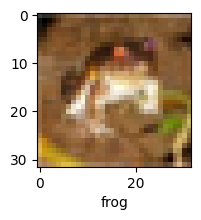

In [21]:
plot_diagram(X_train, y_train, 0)

In [22]:
X_train[0].shape

(32, 32, 3)

In [26]:
cnn = keras.Sequential([
    #cnn layer
    keras.layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu',input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=64,kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    #dense layer
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

cnn.fit(X_train,y_train,epochs=15)

Epoch 1/15
1563/1563 [==============================] - 31s 20ms/step - loss: 1.4535 - accuracy: 0.4798
Epoch 2/15
1563/1563 [==============================] - 31s 20ms/step - loss: 1.1051 - accuracy: 0.6159
Epoch 3/15
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9785 - accuracy: 0.6599
Epoch 4/15
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9033 - accuracy: 0.6861
Epoch 5/15
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8330 - accuracy: 0.7091
Epoch 6/15
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7744 - accuracy: 0.7324
Epoch 7/15
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7247 - accuracy: 0.7493
Epoch 8/15
1563/1563 [==============================] - 30s 19ms/step - loss: 0.6778 - accuracy: 0.7620
Epoch 9/15
1563/1563 [==============================] - 30s 19ms/step - loss: 0.6369 - accuracy: 0.7772
Epoch 10/15
1563/1563 [==============================] - 30s 19m

In [27]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.1181 - accuracy: 0.6896


[1.118127703666687, 0.6895999908447266]

In [30]:
y_predicted = cnn.predict(X_test)
y_predicted

313/313 [==============================] - 2s 6ms/step


array([[3.9621517e-07, 2.3044899e-08, 9.5628893e-05, ..., 1.7523421e-07,
        8.8611880e-05, 5.3793502e-07],
       [4.3071770e-05, 1.0602446e-03, 2.4025906e-10, ..., 1.1337799e-11,
        9.9889624e-01, 3.5207532e-07],
       [4.0078780e-01, 1.4080341e-01, 1.3632340e-04, ..., 2.4773148e-03,
        4.5000073e-01, 1.3376752e-04],
       ...,
       [6.6097768e-06, 1.4041285e-11, 7.8078240e-02, ..., 7.1113899e-02,
        3.3287529e-06, 9.8858202e-08],
       [1.9684131e-01, 7.9279060e-05, 4.3267398e-03, ..., 3.2435823e-04,
        4.5964853e-08, 1.0746754e-07],
       [4.6913500e-09, 1.2398139e-09, 1.2355831e-06, ..., 6.6915154e-01,
        2.2288682e-09, 2.8751503e-11]], dtype=float32)

In [32]:
y_pred = [np.argmax(i) for i in y_predicted]
y_pred[0:5]

[3, 8, 8, 0, 6]

In [33]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [34]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[676,  11,  73,  48,  27,  20,  14,  22,  73,  36],
       [ 40, 724,  17,  20,  11,   7,  17,   7,  39, 118],
       [ 44,   1, 576, 108,  84,  73,  68,  36,   6,   4],
       [ 10,   4,  52, 603,  64, 159,  64,  30,   7,   7],
       [ 16,   0,  58, 120, 648,  46,  50,  53,   9,   0],
       [  7,   3,  41, 229,  49, 597,  20,  47,   4,   3],
       [  1,   3,  37,  92,  43,  20, 792,   6,   5,   1],
       [  7,   2,  32,  68,  89,  73,  14, 711,   1,   3],
       [ 74,  17,  14,  42,   4,  11,  12,   6, 797,  23],
       [ 32,  31,  16,  46,  10,  13,  15,  30,  35, 772]], dtype=int32)>

<Axes: >

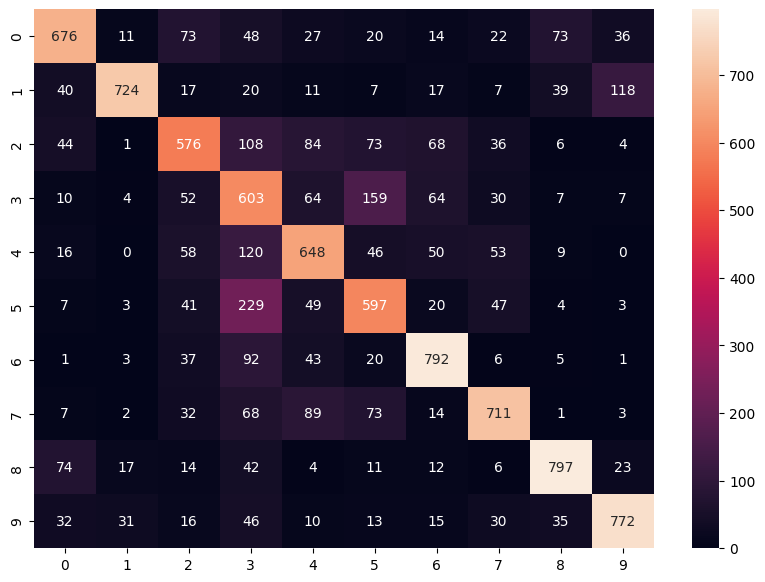

In [38]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')